In [1]:
import fl_funcs
import numpy as np
from fl_funcs import exponential
from fl_funcs import exponential_neg
from scipy.io import readsav
import time

year = 2013
mo = 10
day = 13
sthr = 0
stmin = 12
arnum = 11865
xclnum = 1.7
xcl = 'M'
flnum = 1401
instrument = 'n5'
daystr = '13'
mostr = 'oct'
mostrcap = 'Oct'
yearstr = '2013'
imp = -6.18

In [2]:
bestflarefile = '/Users/coletamburri/Desktop/imp_dev/all_and_best_Oct_2022.mat'

print("Loading the data...")

sav_data_aia, sav_data, best304, start304, peak304, end304, eventindices,\
    times304, curves304, aia_cumul8, aia_step8, last_cumul8, hmi_dat,\
    last_mask = fl_funcs.load_variables(bestflarefile, year, mo, day, sthr,
                                        stmin, arnum, xclnum, xcl)

X, Y, conv_f, xarr_Mm, yarr_Mm = fl_funcs.conv_facts()

print("Data loaded! Now just some masking and spur removal.")

hmi_cumul_mask1, hmi_step_mask1, hmi_pos_mask_c, hmi_neg_mask_c \
    = fl_funcs.pos_neg_masking(aia_cumul8, aia_step8, hmi_dat, last_mask)

neg_rem, pos_rem = fl_funcs.spur_removal_sep(hmi_neg_mask_c, hmi_pos_mask_c,
                                             pos_crit=3, neg_crit=2)

print("Convolving the HMI images and making the PIL mask.")

hmi_con_pos_c, hmi_con_neg_c, pil_mask_c = fl_funcs.gauss_conv(
    pos_rem, neg_rem)

pil_mask_c, ivs, dvs, hmik = fl_funcs.pil_gen(pil_mask_c, hmi_dat)

print("Separation values determination.")

aia8_pos_step, aia8_neg_step = fl_funcs.mask_sep(aia_step8, hmi_dat)

distpos_med, distpos_mean, distneg_med, distpos_mean \
    = fl_funcs.separation(aia_step8, ivs, dvs, aia8_pos_step, aia8_neg_step)

print("Elongation values determination.")

aia8_pos_2, aia8_neg_2 = fl_funcs.mask_elon(aia_cumul8, hmi_dat)

neg_rem1, pos_rem1 = fl_funcs.spur_removal_elon(aia8_pos_2, aia8_neg_2)

ivs_lim, dvs_lim, med_x, med_y = fl_funcs.lim_pil(ivs, dvs)


Loading the data...
Data loaded! Now just some masking and spur removal.
Convolving the HMI images and making the PIL mask.
Separation values determination.
Elongation values determination.


In [3]:
ylim0_neg = 400
ylim1_neg = int(round(med_y)+100)
ylim0_pos = int(round(med_y)-100)
ylim1_pos = int(round(med_y)+100)
xlim0_neg = 300
xlim1_neg = 400
xlim0_pos = 350
xlim1_pos = int(round(med_y)+100)

aia_pos_rem, aia_neg_rem = fl_funcs.rib_lim_elon(aia8_pos_2, aia8_neg_2,
                                                 pos_rem1, neg_rem1, med_x,
                                                 med_y, ylim0_pos, ylim1_pos,
                                                 ylim0_neg, ylim1_neg,
                                                 xlim0_pos, xlim1_pos,
                                                 xlim0_neg, xlim1_neg)

In [4]:
lr_coord_neg, lr_coord_pos = fl_funcs.find_rib_coordinates(aia_pos_rem,
                                                           aia_neg_rem)

ivs_sort, dvs_sort, sortedpil = fl_funcs.sort_pil(ivs_lim, dvs_lim)

pil_right_near_pos, pil_left_near_pos, pil_right_near_neg, pil_left_near_neg \
    = fl_funcs.elon_dist_arrays(lr_coord_pos, lr_coord_neg, ivs_lim, dvs_lim,
                                ivs_sort, dvs_sort)

lens_pos, lens_neg = fl_funcs.elongation(pil_right_near_pos, pil_left_near_pos,
                                         pil_right_near_neg, pil_left_near_neg,
                                         sortedpil)

dist_pos = distpos_med
dist_neg = distneg_med

In [5]:
print("Converting separation and elongation to Mm.")

lens_pos_Mm, lens_neg_Mm, distpos_Mm, distneg_Mm, dneg_len, dpos_len, \
    dneg_dist, dpos_dist = fl_funcs.convert_to_Mm(lens_pos, dist_pos, lens_neg,
                                                  dist_neg, conv_f)

print("Loading parameters for 304 and 1600 Angstrom light curves.")

startin, peakin, endin, times, s304, e304, filter_304, med304, std304, \
    timelab, aiadat, nt, dn1600, time304, times1600 \
    = fl_funcs.prep_304_1600_parameters(sav_data_aia, sav_data, eventindices,
                                        flnum, start304, peak304, end304,
                                        times304, curves304)

Converting separation and elongation to Mm.
Loading parameters for 304 and 1600 Angstrom light curves.


In [6]:
posrib, negrib, pos1600, neg1600 = fl_funcs.img_mask(aia8_pos_step,
                                                     aia8_neg_step, aiadat, nt)

print("Determining the regions of separation and elongation.")

elonperiod_start_pos, elonperiod_end_pos, elonperiod_start_neg, \
    elonperiod_end_neg = fl_funcs.elon_periods(dpos_len, dneg_len)

sepperiod_start_pos, sepperiod_end_pos, sepperiod_start_neg, \
    sepperiod_end_neg = fl_funcs.sep_periods(dpos_dist, dneg_dist)

dt1600, dt304 = fl_funcs.prep_times(dn1600, time304)

Determining the regions of separation and elongation.


Plotting ribbon masks.
Plotting convolution masks.
Plotting PIL with representative polynomial.


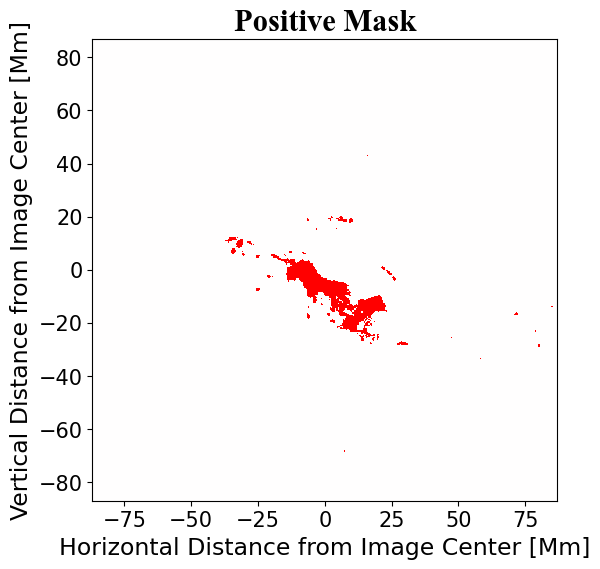

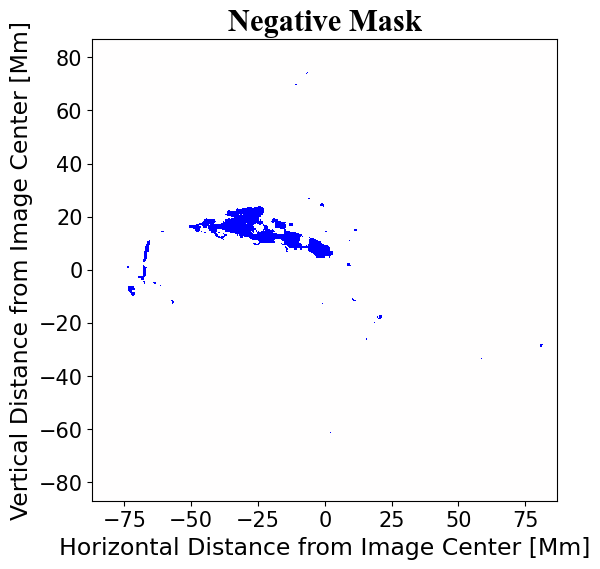

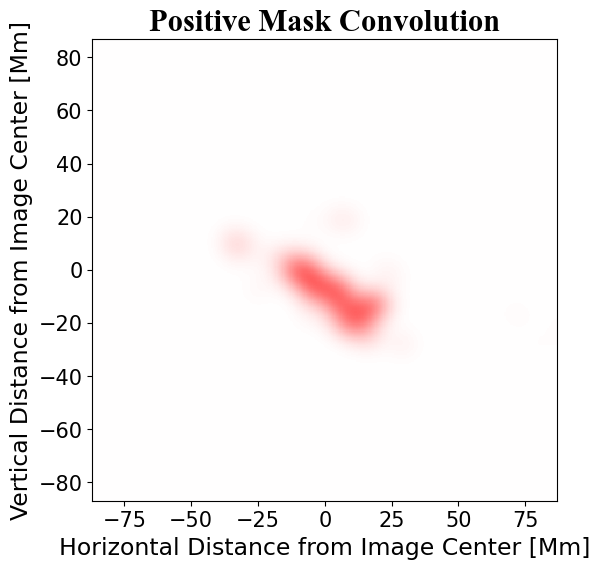

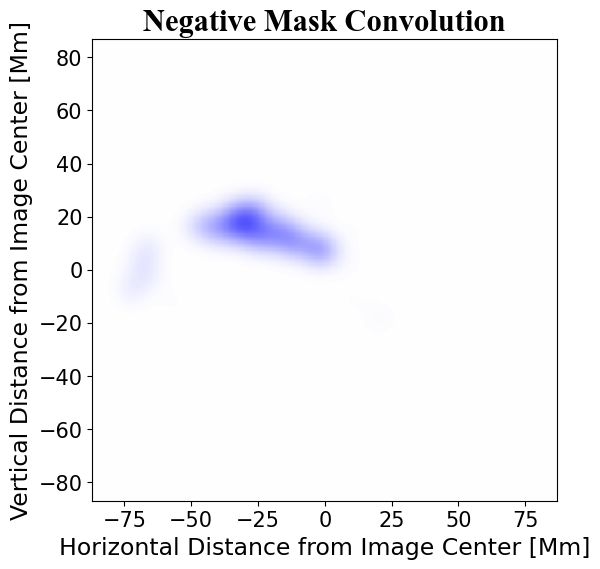

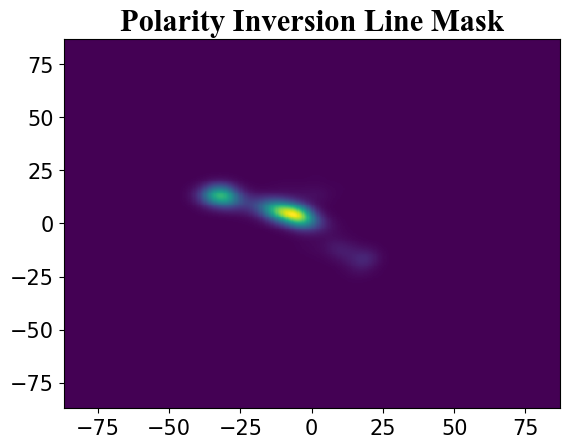

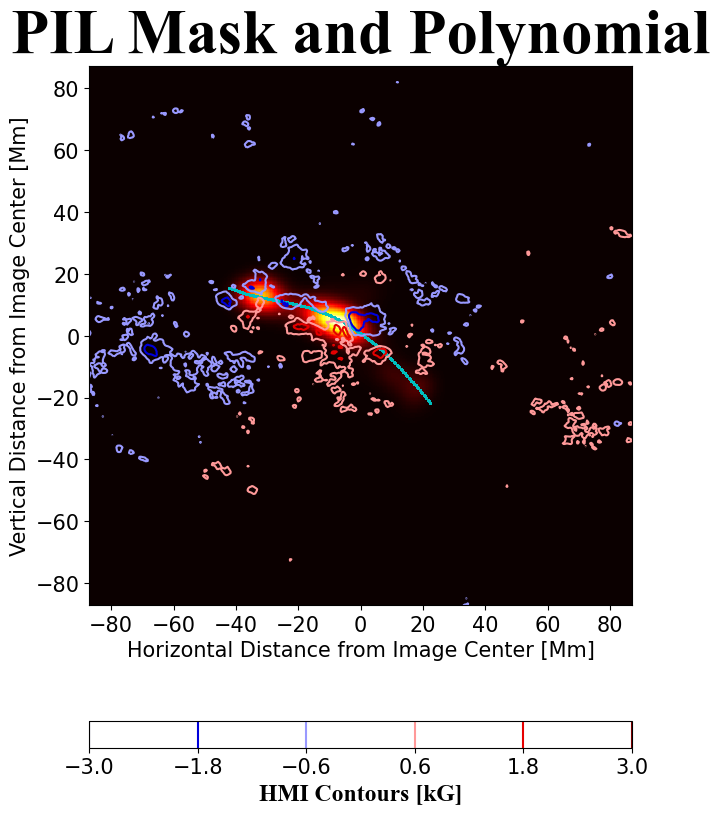

In [7]:
print("Plotting ribbon masks.")

fl_funcs.mask_plotting(X, Y, pos_rem, neg_rem, xarr_Mm, yarr_Mm, flnum)

print("Plotting convolution masks.")

fl_funcs.convolution_mask_plotting(X, Y, hmi_con_pos_c, hmi_con_neg_c,
                                   pil_mask_c, xarr_Mm, yarr_Mm, flnum,
                                   xlim=[200, 600], ylim=[200, 600])

print("Plotting PIL with representative polynomial.")

fl_funcs.pil_poly_plot(X, Y, pil_mask_c, hmi_dat, ivs, dvs, conv_f, xarr_Mm,
                       yarr_Mm, flnum)

Plotting ribbon separation.
Plotting ribbon elongation.


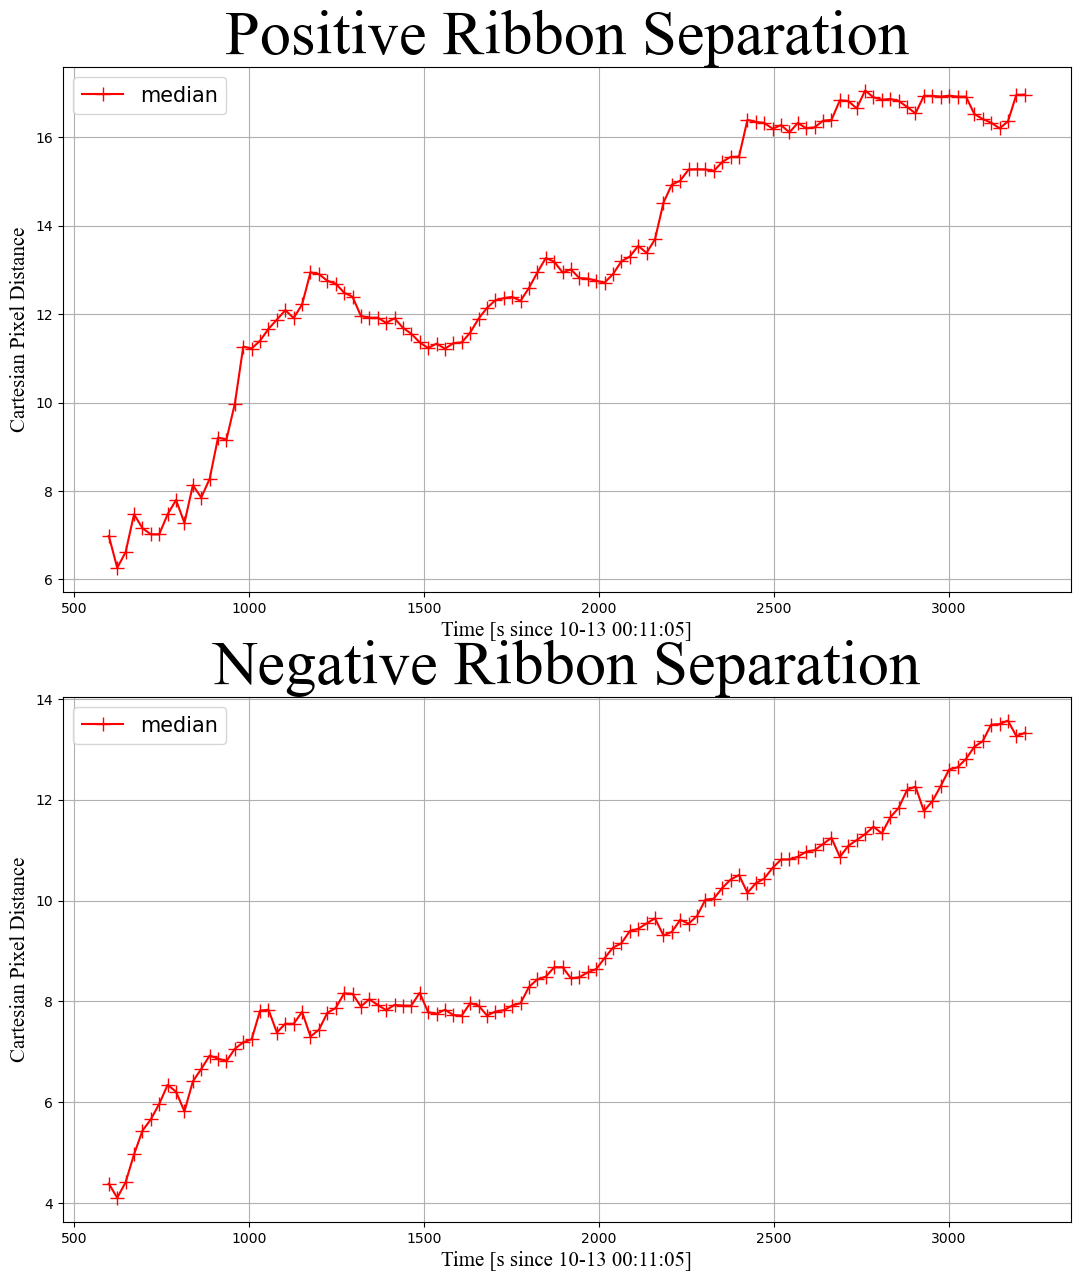

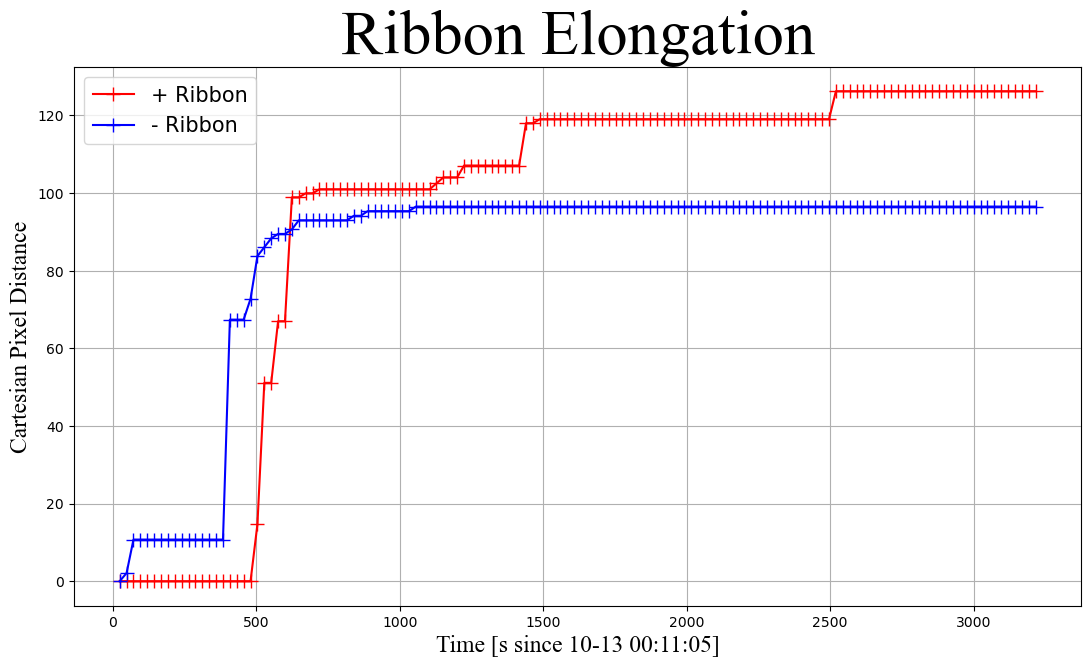

In [8]:
print("Plotting ribbon separation.")

pltstrt = 25

fl_funcs.ribbon_sep_plot(dist_pos, dist_neg, times, flnum, pltstrt, dt1600)

print("Plotting ribbon elongation.")

pltstrt = 1

fl_funcs.ribbon_elon_plot(lens_pos, lens_neg, times, pltstrt, flnum, dt1600)

Plotting Elongation with Periods
Plotting Separation with Periods


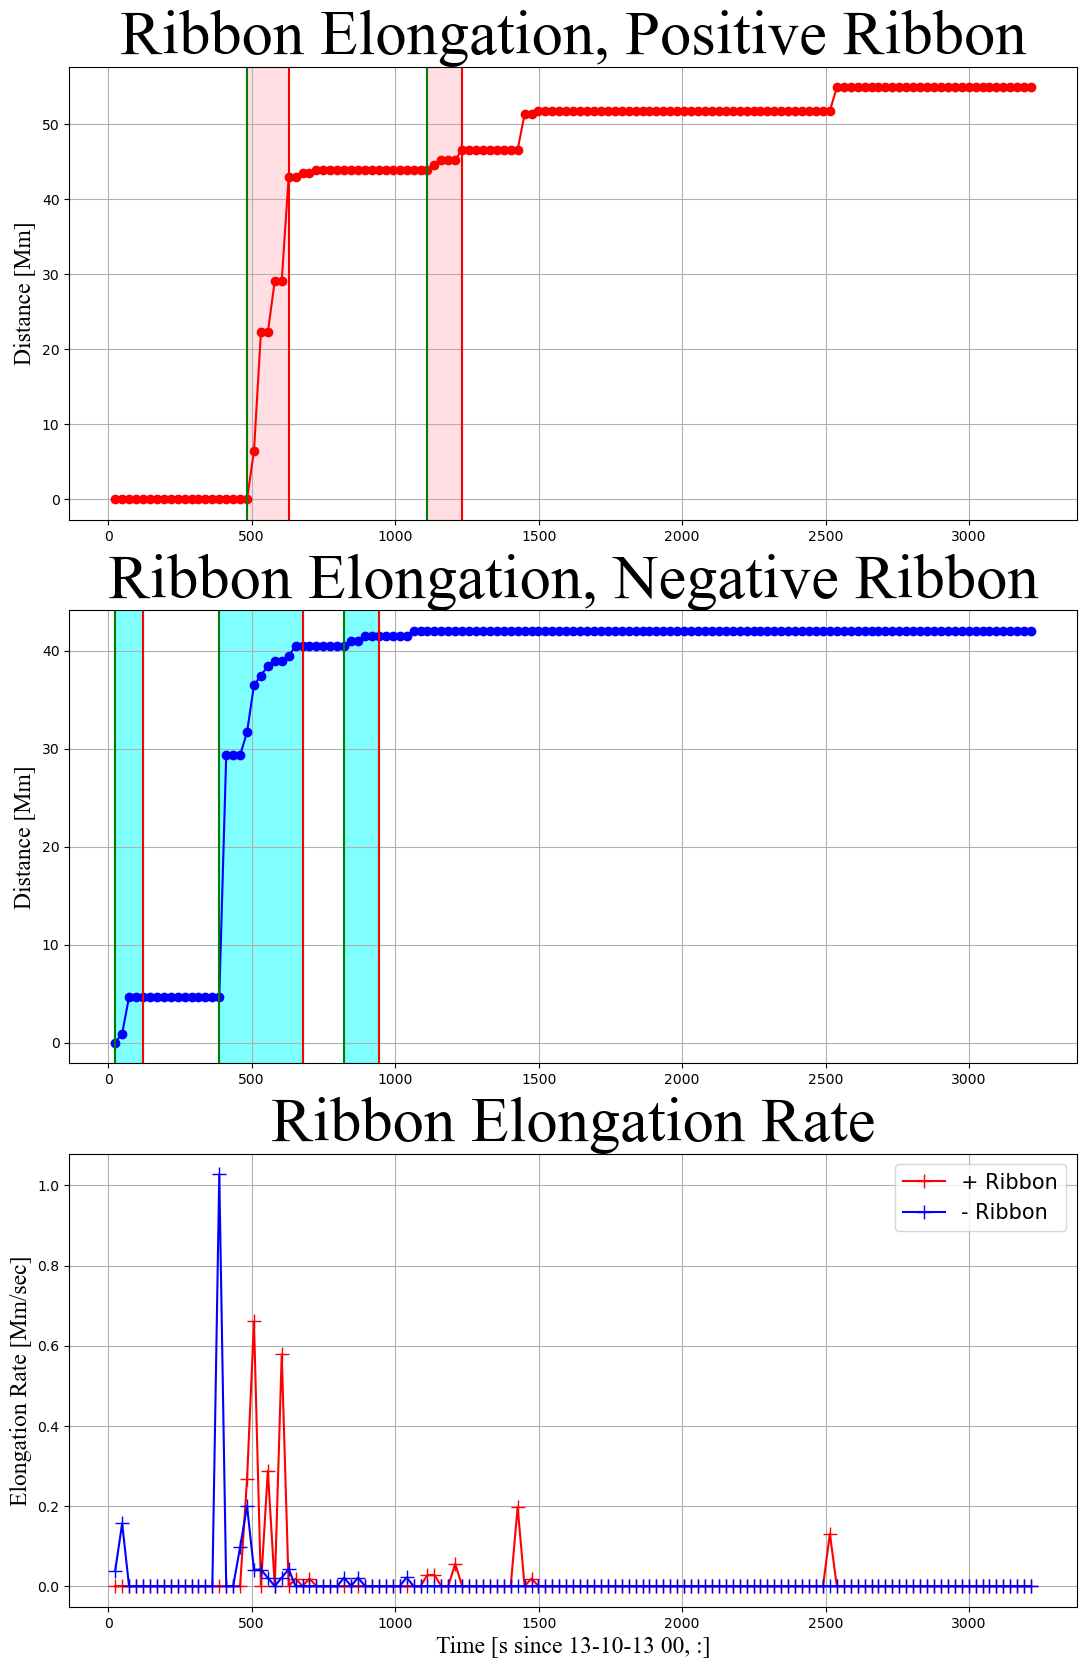

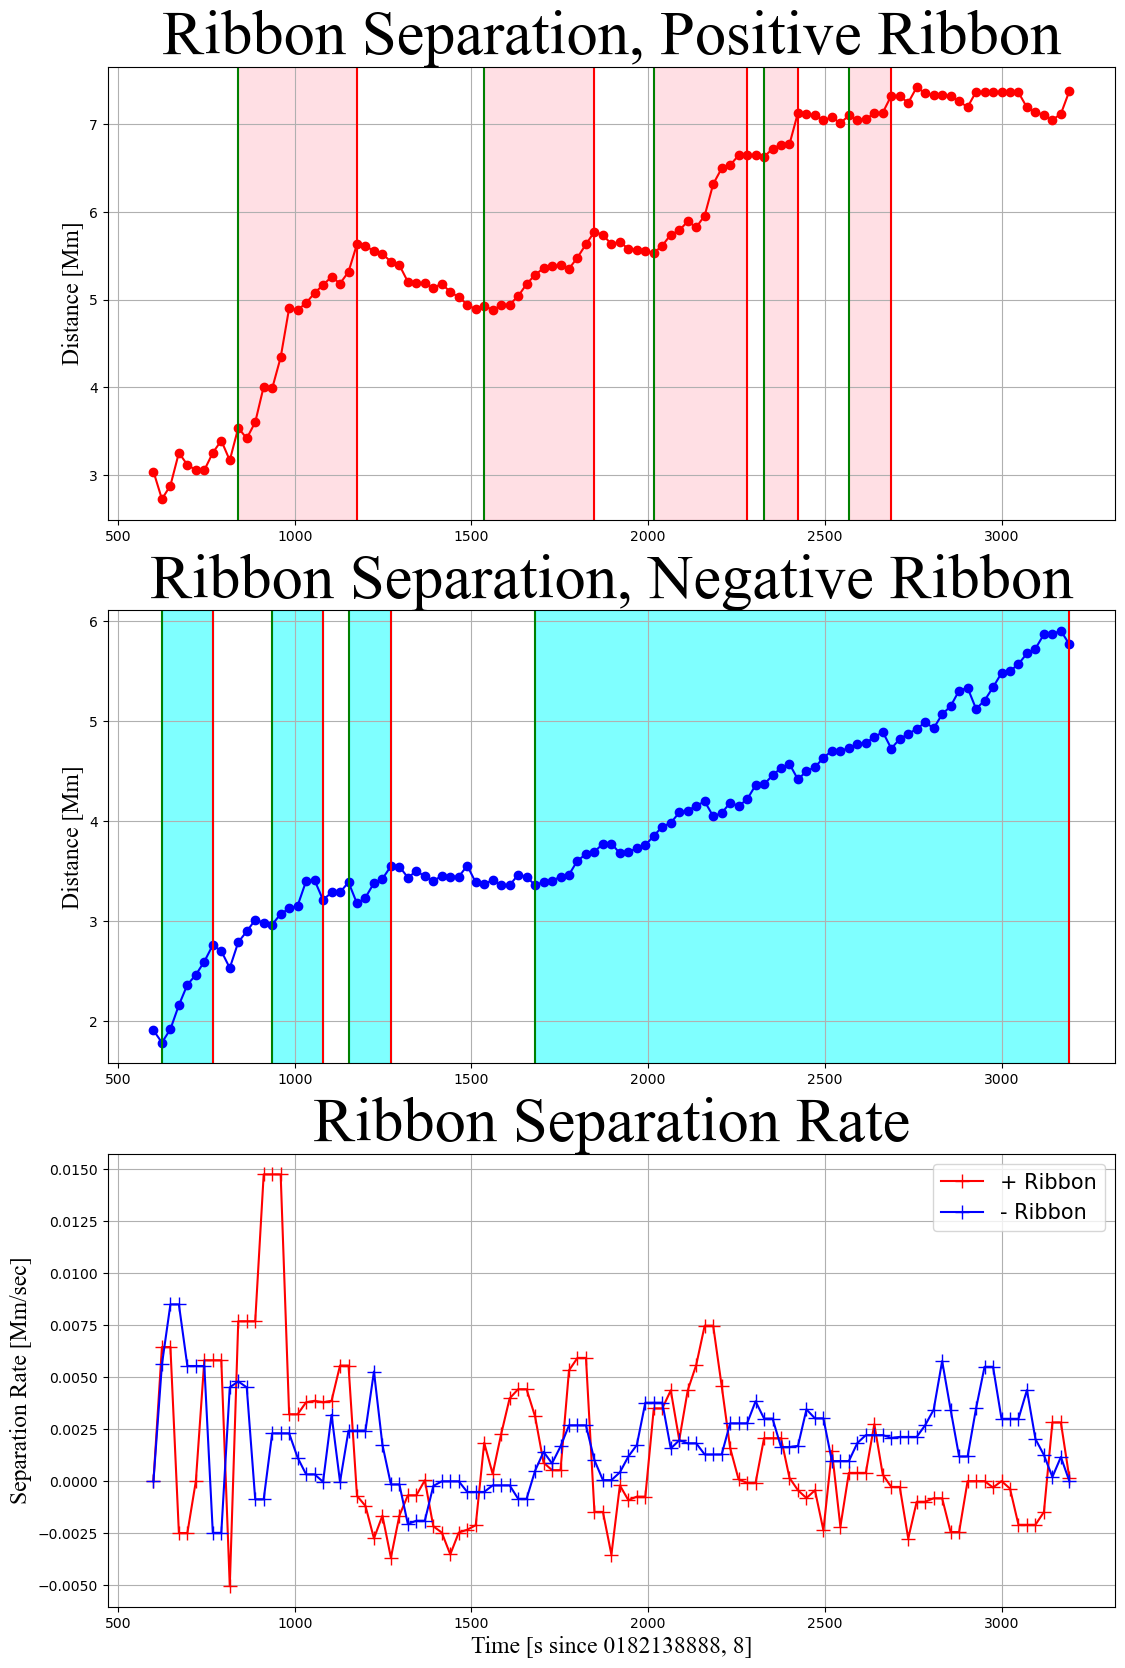

In [9]:
print("Plotting Elongation with Periods")

fl_funcs.elon_period_plot(dpos_len, dneg_len, times, times1600, lens_pos_Mm,
                          lens_neg_Mm, flnum, elonperiod_start_neg,
                          elonperiod_start_pos, elonperiod_end_neg,
                          elonperiod_end_pos)

print("Plotting Separation with Periods")

indstrt = 25
fl_funcs.sep_period_plot(dpos_dist, dneg_dist, times, distpos_Mm, distneg_Mm,
                         flnum, sepperiod_start_pos, sepperiod_end_pos,
                         sepperiod_start_neg, sepperiod_end_neg,
                         indstrt=indstrt)

Processing data for reconnection flux model.
Load fluxes and pixel counts.


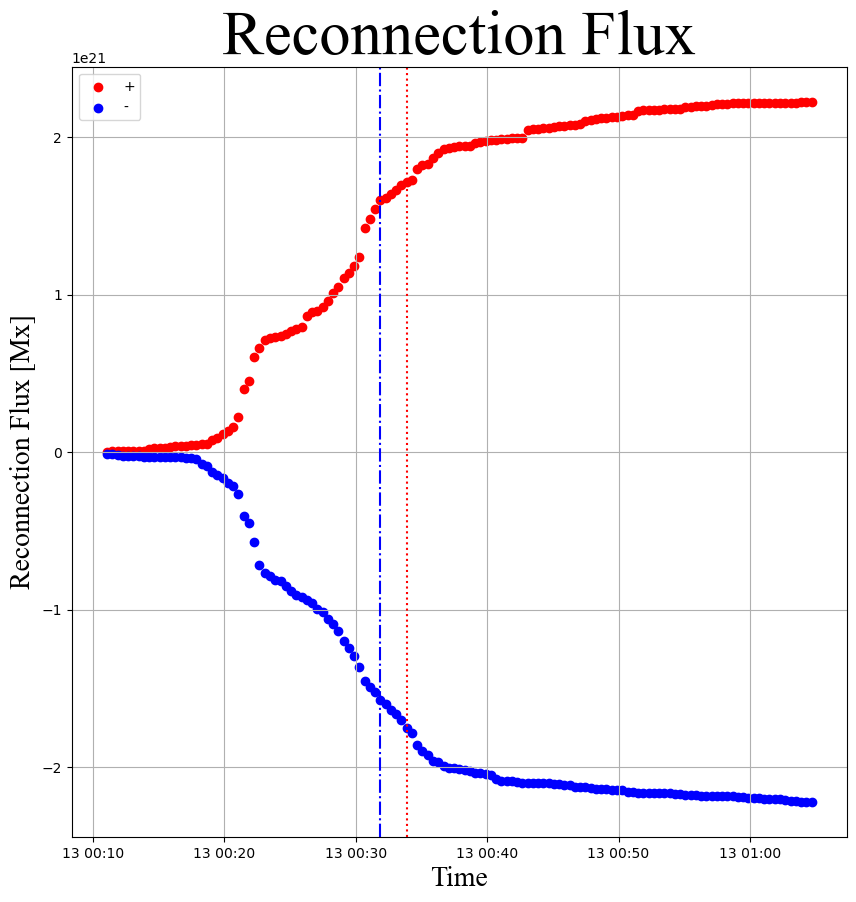

In [10]:
print("Processing data for reconnection flux model.")

hmi, aia8_pos, aia8_neg, aia8_inst_pos, aia8_inst_neg, peak_pos, \
    peak_neg = fl_funcs.flux_rec_mod_process(
        sav_data, dt1600, pos1600, neg1600)

print("Load fluxes and pixel counts.")

rec_flux_pos, rec_flux_neg, pos_pix, neg_pix, pos_area_pix, neg_area_pix, ds2,\
    pos_area, neg_area = fl_funcs.cumul_flux_process(aia8_pos, aia8_neg,
                                                     conv_f, flnum, peak_pos,
                                                     peak_neg, hmi, dt1600)

The same, for instantaneous flux.
Exponential curve fitting for the fluxes.


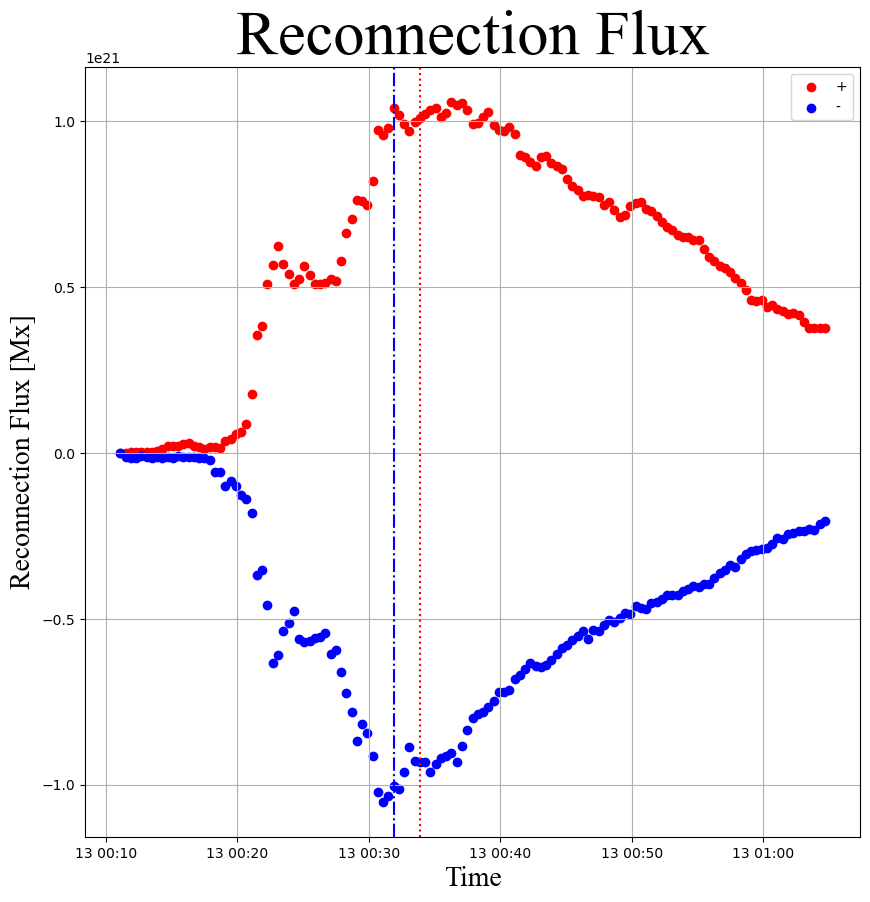

In [11]:
print("The same, for instantaneous flux.")

rec_flux_pos_inst, rec_flux_neg_inst, pos_pix_inst, neg_pix_inst, \
    ds2 = fl_funcs.inst_flux_process(aia8_inst_pos, aia8_inst_neg, flnum,
                                     conv_f, hmi, dt1600, peak_pos, peak_neg)

exp_ind = 29
exp_ind_area = 29
print("Exponential curve fitting for the fluxes.")

poptposflx, pcovposflx, poptnegflx, pcovnegflx, \
    poptpos, poptneg, pcovpos, pcovneg, rise_pos_flx, \
    rise_neg_flx = fl_funcs.exp_curve_fit(exp_ind, exp_ind_area, pos_pix,
                                          neg_pix, exponential,
                                          exponential_neg, pos_area, neg_area)

Exponential curve plot.
Reconnection Rate Determination, Plotting.


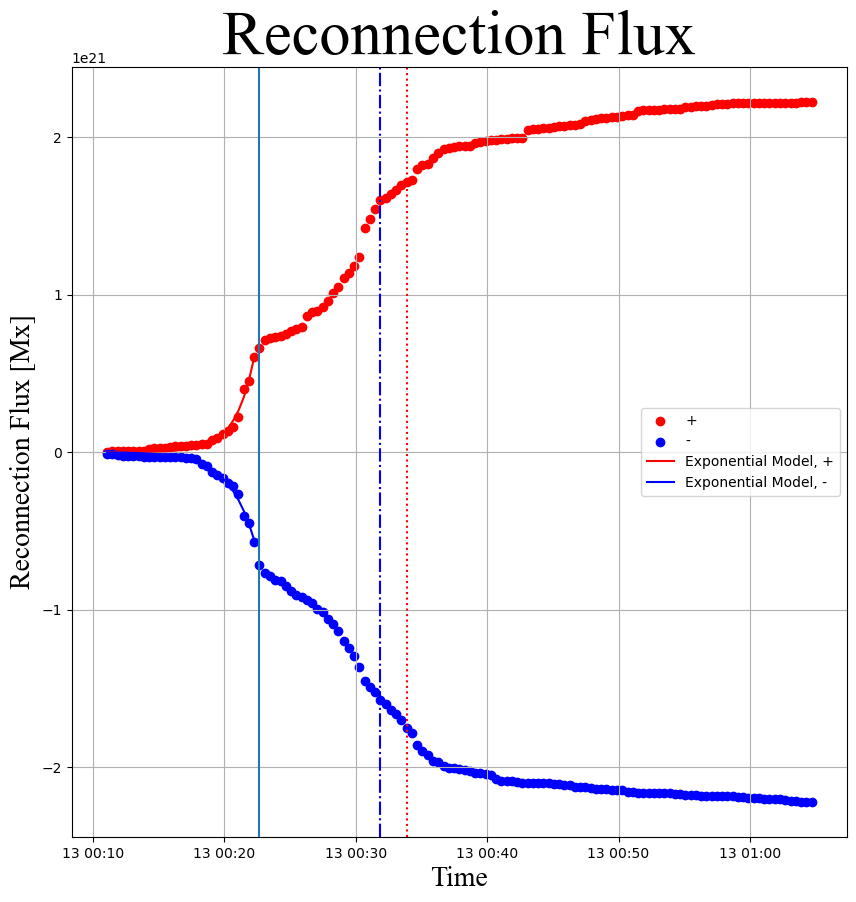

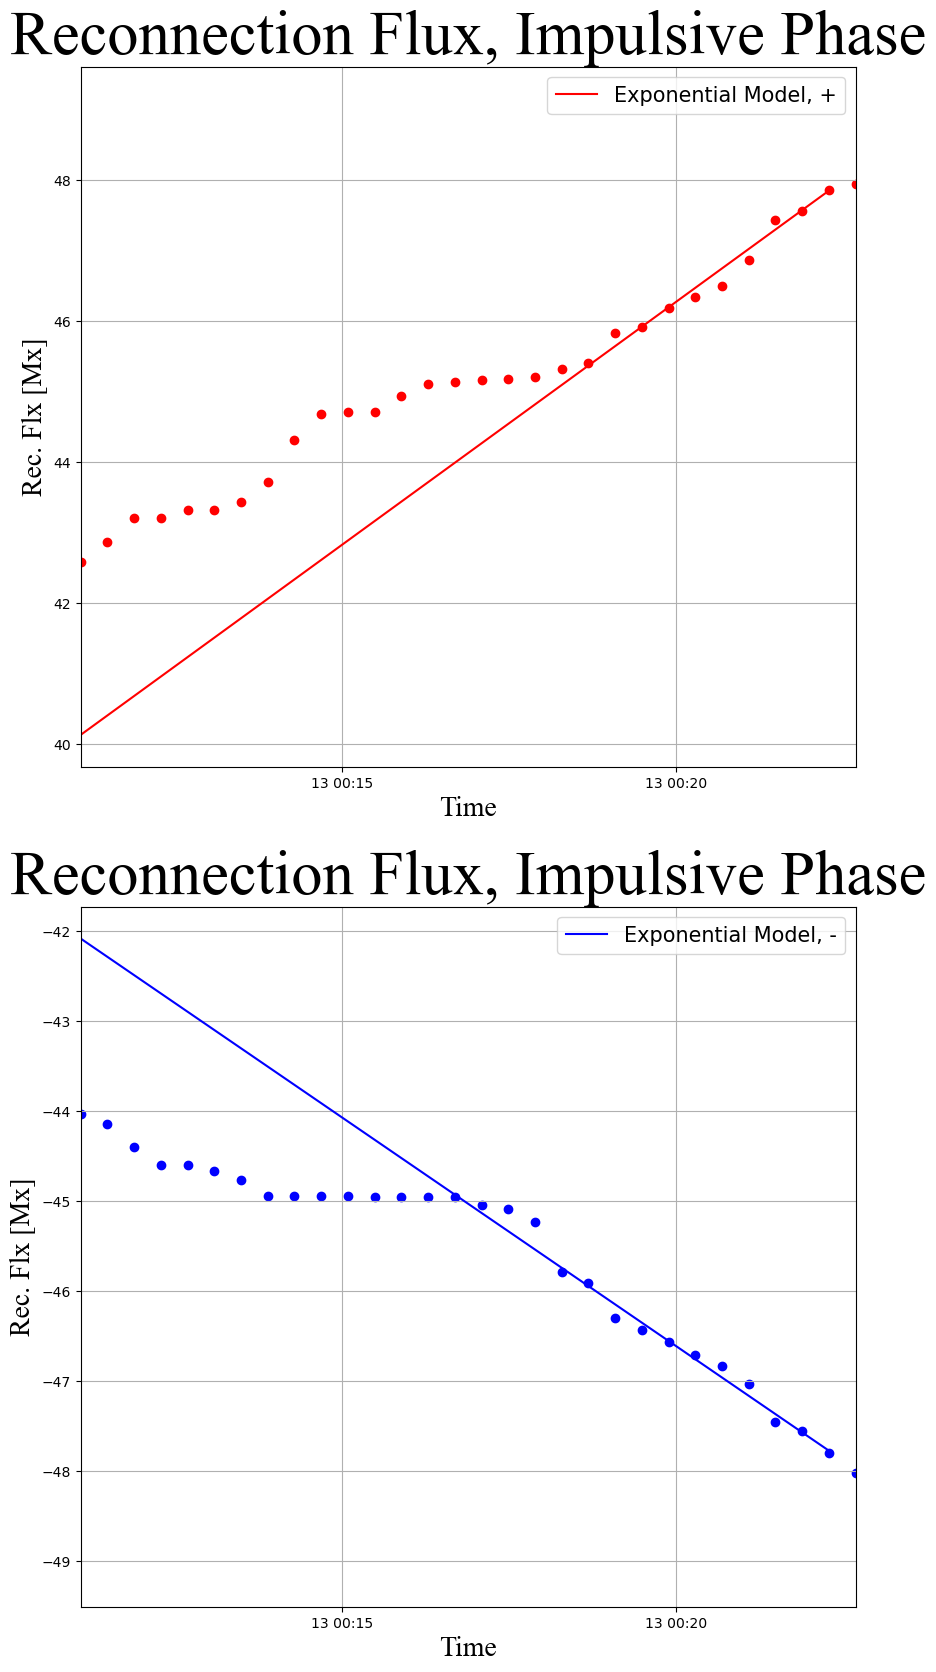

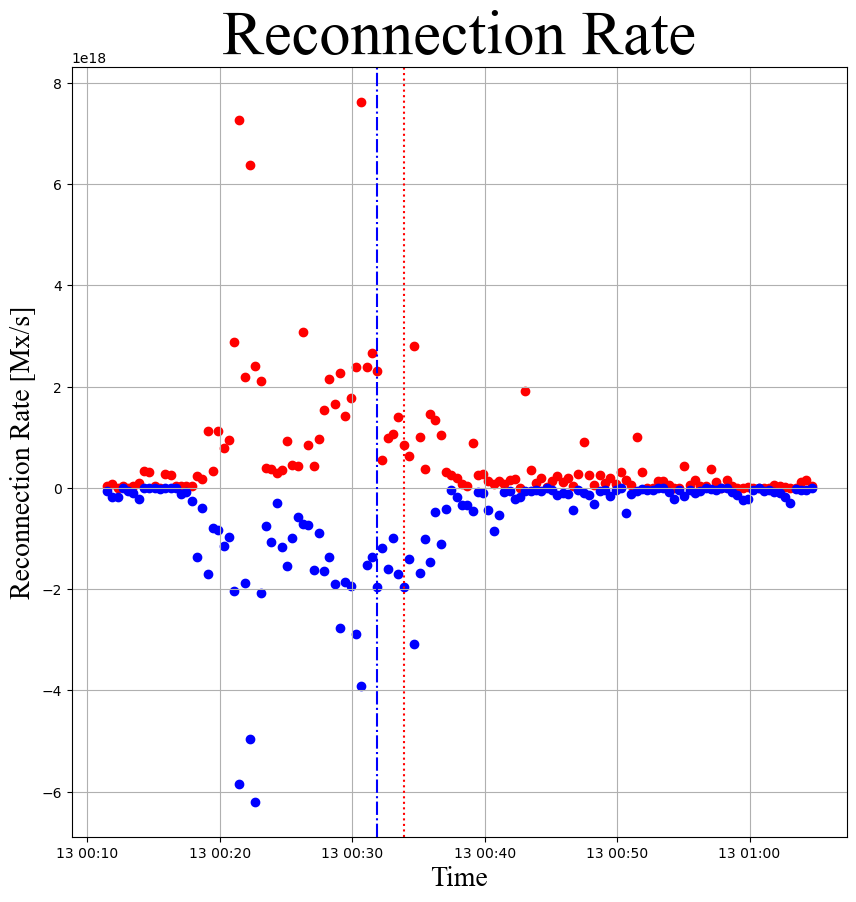

In [12]:
print("Exponential curve plot.")

fl_funcs.exp_curve_plt(dt1600, rec_flux_pos, rec_flux_neg, rise_pos_flx,
                       rise_neg_flx, peak_pos, peak_neg, exp_ind, ds2,
                       exponential, exponential_neg, poptposflx, poptnegflx,
                       flnum)

#print("Ribbon Area Plot")

#fl_funcs.rib_area_plt(dt1600, poptpos, poptneg, flnum, pos_area_pix,
#                      neg_area_pix, peak_pos, peak_neg, exp_ind)

print("Reconnection Rate Determination, Plotting.")

rec_rate_pos, rec_rate_neg = fl_funcs.rec_rate(rec_flux_pos, rec_flux_neg,
                                               dn1600, dt1600, peak_pos,
                                               peak_neg, flnum)

In [13]:
print("Begin determination of shear.")


# Establish limits for ribbons corresponding to shear code.
negylow = ylim0_neg
negyhi = ylim1_neg
negxlow = xlim0_neg
negxhi = xlim1_neg

posylow = ylim0_pos
posyhi = ylim1_pos
posxlow = xlim0_pos
posxhi = xlim1_pos

# Isolate ribbons appropriately for shear analysis
aia_neg_rem_shear, aia_pos_rem_shear = fl_funcs.\
    shear_ribbon_isolation(aia8_neg_step, aia8_pos_step, med_x, med_y,
                           negylow=negylow, negyhi=negyhi, posylow=posylow,
                           posyhi=posyhi, negxlow=negxlow, negxhi=negxhi,
                           posxlow=posxlow, posxhi=posxhi, flag=1)

Begin determination of shear.


In [14]:
# Left and right coordinates of positive and negative ribbons
lr_coord_neg_shear, lr_coord_pos_shear = \
    fl_funcs.leftrightshear(aia_pos_rem_shear, aia_neg_rem_shear)

# PIL pixels closest to the left and right coordinates of positive and negative
# ribbons
pil_right_near_pos_shear, pil_left_near_pos_shear, pil_right_near_neg_shear,\
    pil_left_near_neg_shear = fl_funcs.sheardists(lr_coord_pos_shear,
                                                  lr_coord_neg_shear,
                                                  ivs_sort, dvs_sort)

# Guide field to the right and left edges of ribbons
guide_right, guide_left = fl_funcs.guidefieldlen(pil_right_near_pos_shear,
                                                 pil_left_near_pos_shear,
                                                 pil_right_near_neg_shear,
                                                 pil_left_near_neg_shear,
                                                 sortedpil,
                                                 fl_funcs.curve_length)

Plot guide field ratio proxy based on footpoints.
Fermi Processing


/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:3787: RuntimeWarning: invalid value encountered in true_divide
  left_gfr = guide_left/(distneg_med+distpos_med)
/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:3788: RuntimeWarning: invalid value encountered in true_divide
  right_gfr = guide_right/(distneg_med+distneg_med)


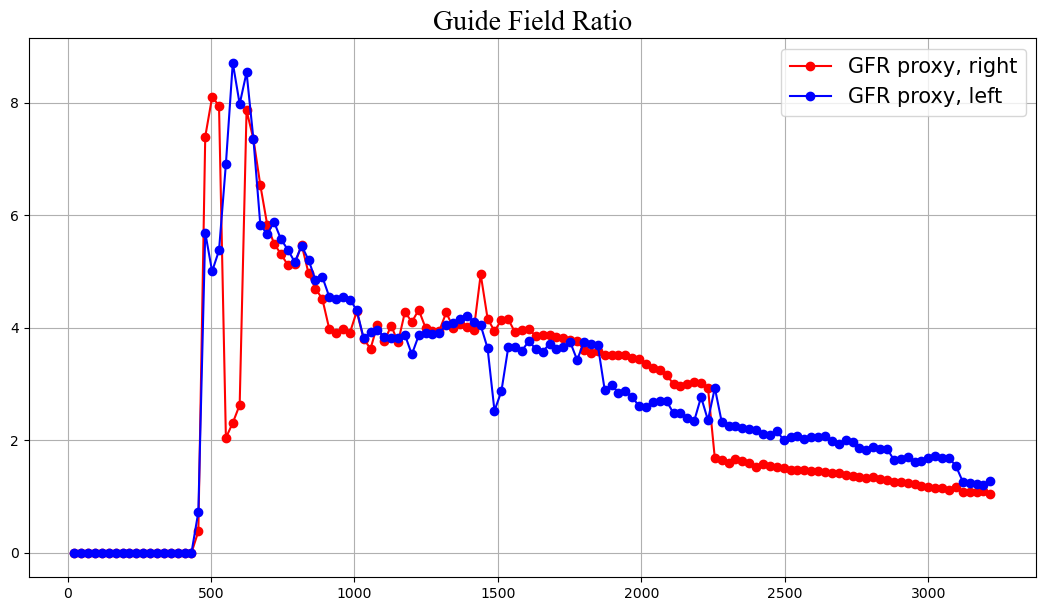

In [15]:
# Guide field ratio to the right and left edges of ribbons
left_gfr, right_gfr = fl_funcs.gfrcalc(guide_left, guide_right,
                                       distneg_med, distpos_med)

print("Plot guide field ratio proxy based on footpoints.")

# Plot guide field ratio
fl_funcs.plt_gfr(times, right_gfr, left_gfr, flnum, dt1600)

print("Fermi Processing")

raw_hxr_sum, cspec_hxr_sum, fermitimes = fl_funcs.process_fermi(daystr, mostr,
                                                                yearstr,
                                                                instrument,
                                                                day, mo, year)

/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:4070: RuntimeWarning: divide by zero encountered in true_divide
  E_rat = E_pos/E_neg
/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:4070: RuntimeWarning: invalid value encountered in true_divide
  E_rat = E_pos/E_neg


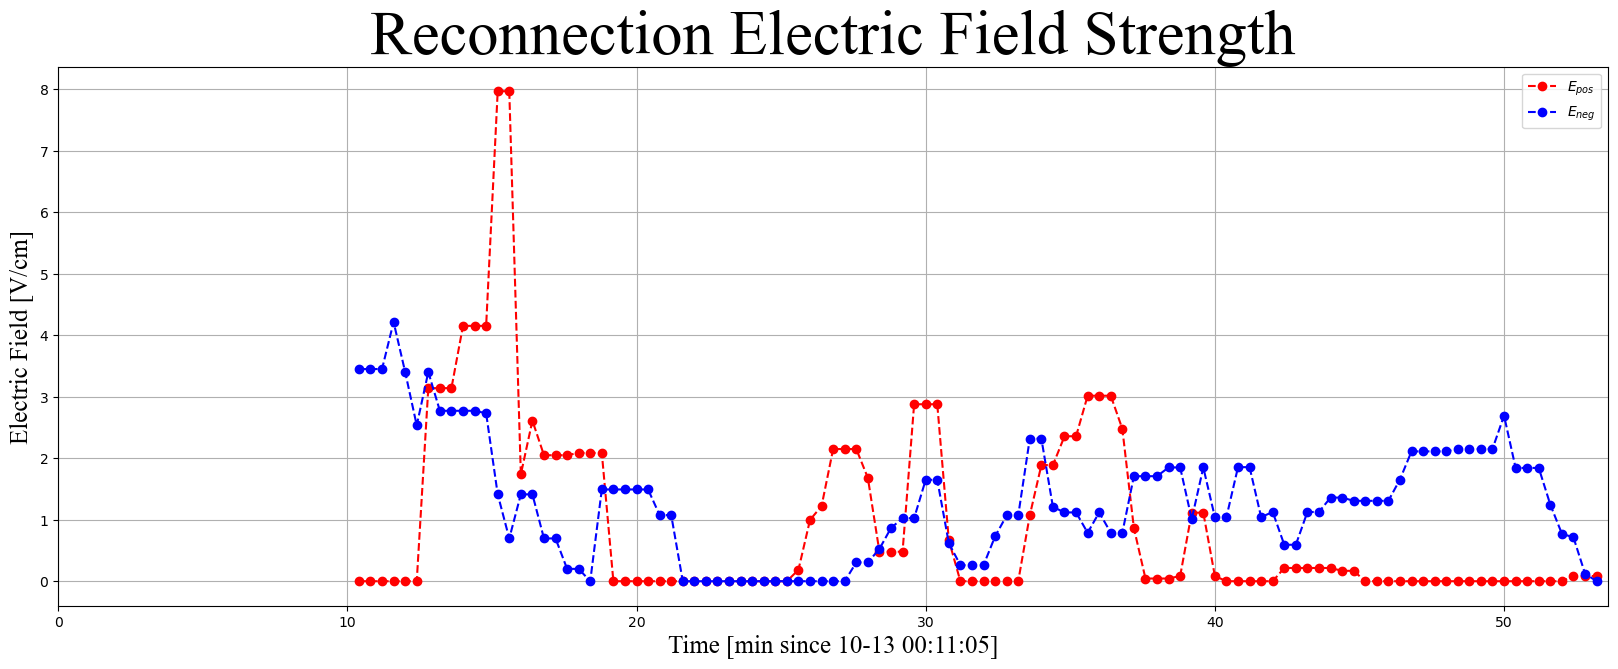

In [16]:
indstrt_sep = 25
indstrt_elon = 1
gfr_trans = 26

# Electric field computation

E_pos, E_neg, E_rat, time_E = fl_funcs.E_field_det(conv_f, distpos_med,
                                                   distneg_med, timelab,
                                                   hmi_dat, pos_rem, neg_rem,
                                                   flnum, dt1600, times,
                                                   startind=gfr_trans)

/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:4118: RuntimeWarning: divide by zero encountered in true_divide
  shear_ang = np.arctan(1/ang_prep)*180./np.pi


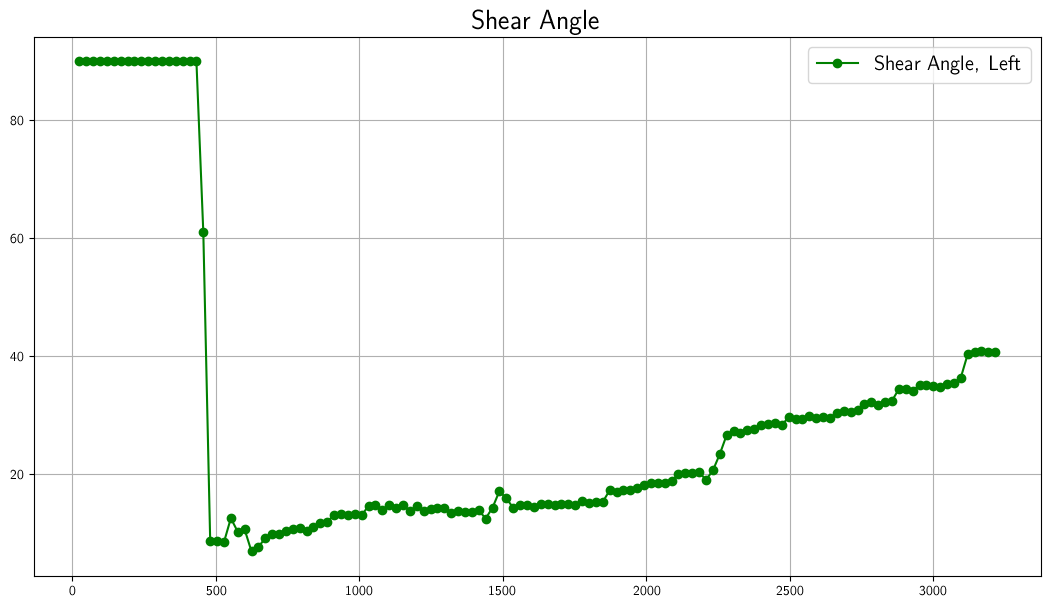

In [25]:
import importlib
importlib.reload(fl_funcs)
E_pos = np.append(E_pos, E_pos[-1])
E_neg = np.append(E_neg, E_neg[-1])

shear_ang = fl_funcs.shear_to_angle(times, flnum, dt1600, left_gfr, right_gfr)

quartermaxtim = fl_funcs.quartermaxtime(gfr_trans, right_gfr, left_gfr,
                                        timelab, fl_funcs.find_nearest_ind,
                                        flag=0)

In [26]:
print(quartermaxtim)

muted = fl_funcs.color_muted()
vibrant = fl_funcs.color_vibrant()
medc = fl_funcs.color_medc()
level = 'low'
sxr_fn='/Users/coletamburri/Desktop/Impulsiveness_Paper/sci_gxrs-l2-irrad_g15_d20131013_v0-0-0.nc'

24.4


In [31]:
import importlib
importlib.reload(fl_funcs)

<module 'fl_funcs' from '/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py'>

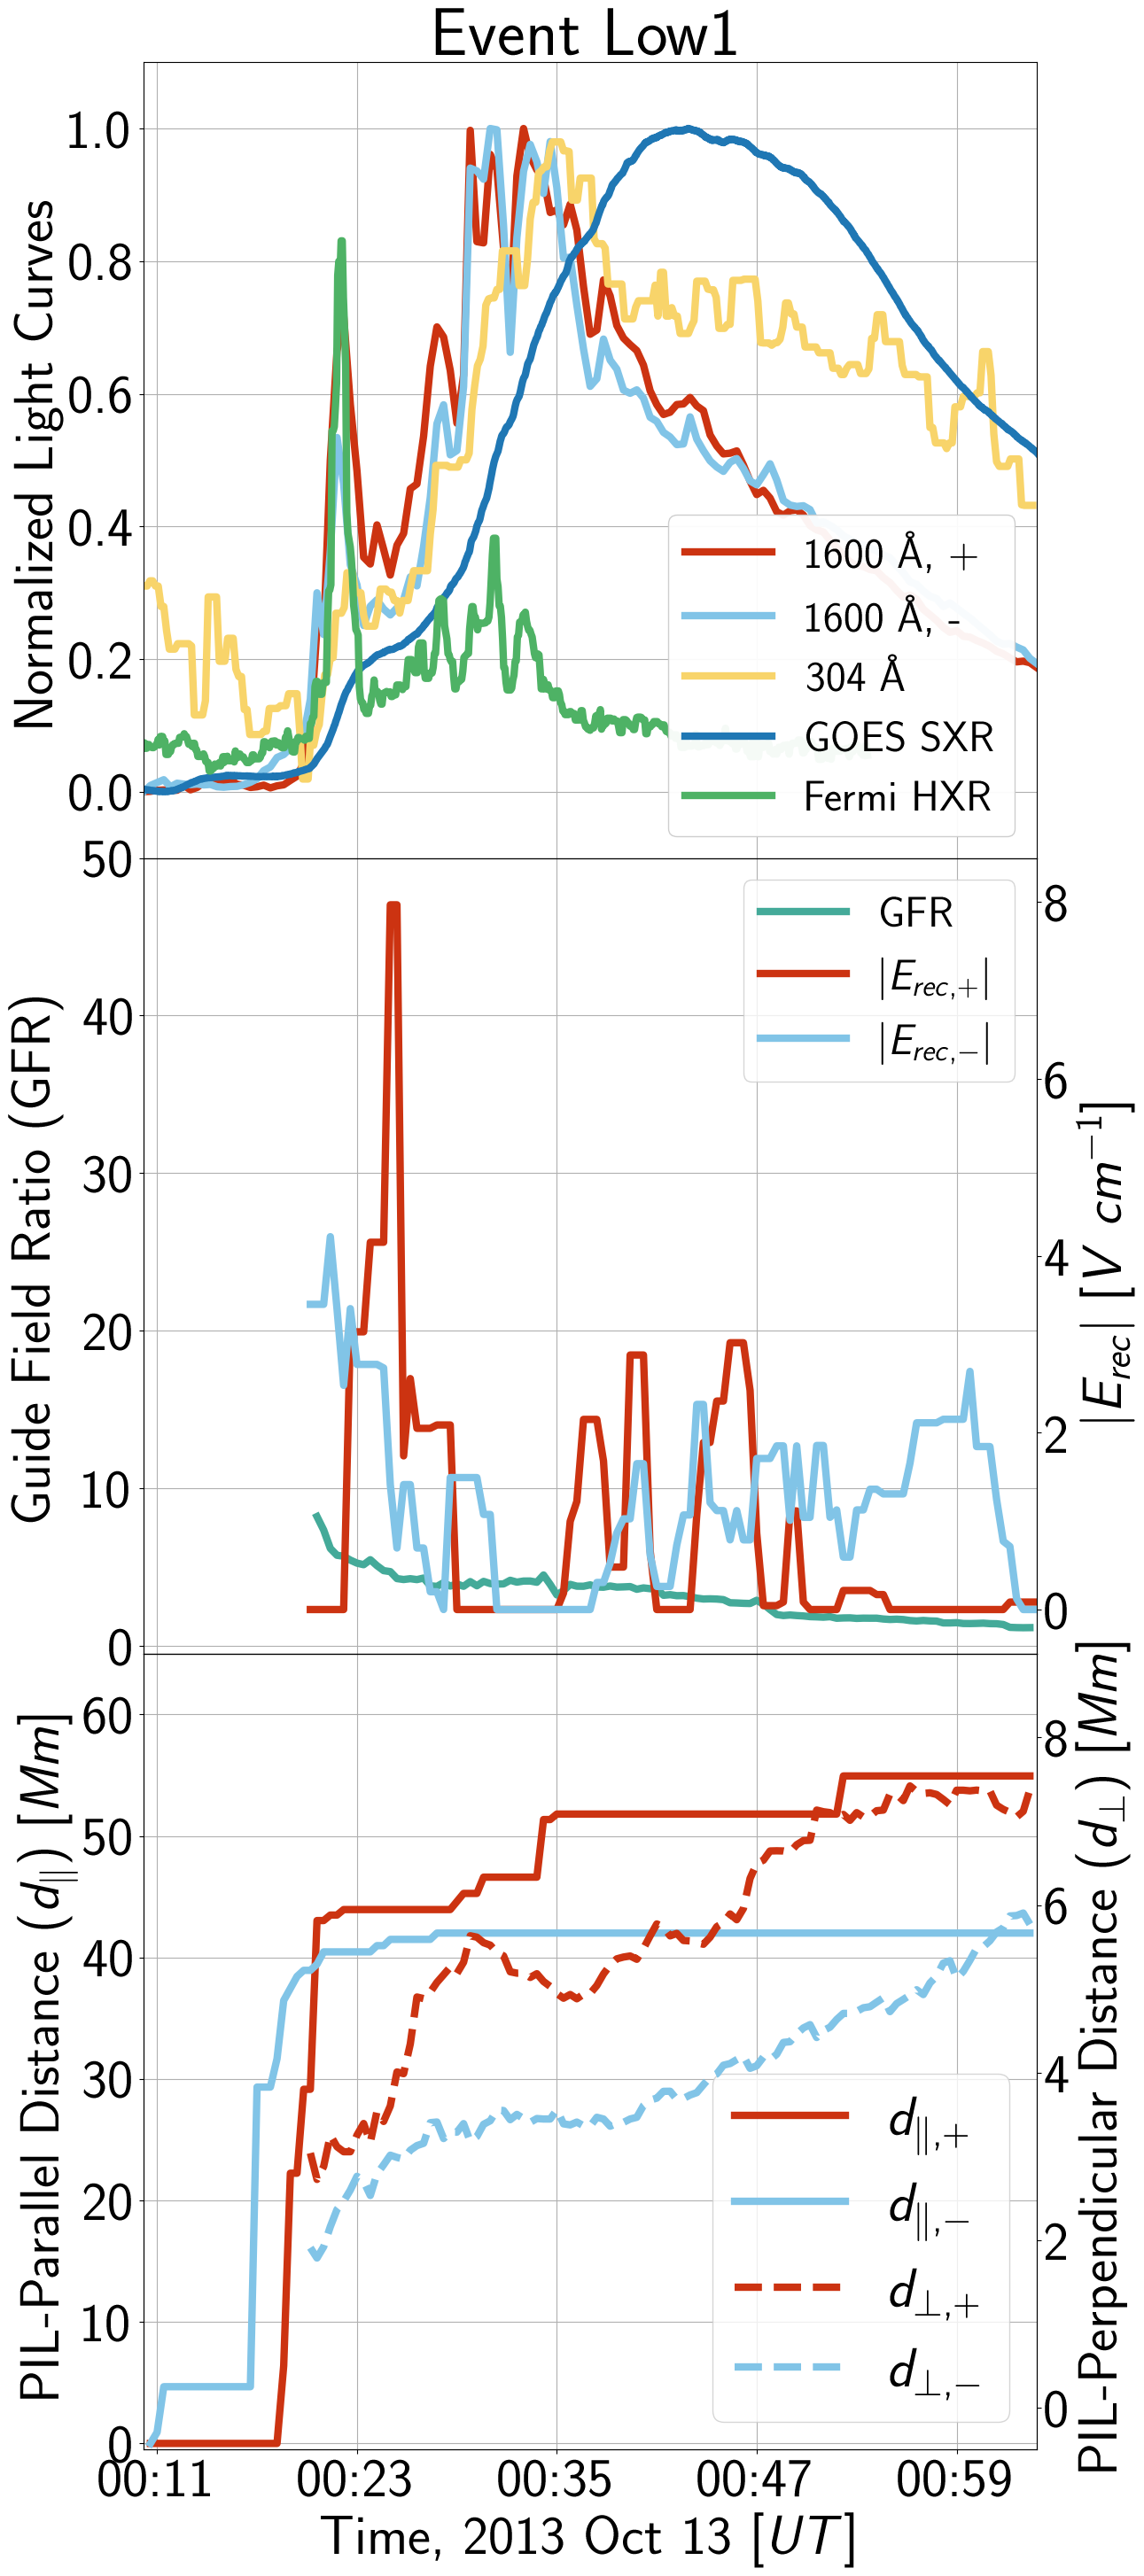

In [32]:
fl_funcs.plt_fourpanel(times, right_gfr, left_gfr, flnum, dt1600, time304,
                       filter_304, lens_pos_Mm, lens_neg_Mm, distpos_Mm,
                       distneg_Mm, dt304, timelab, conv_f,
                       elonperiod_start_pos, elonperiod_end_pos,
                       elonperiod_start_neg, elonperiod_end_neg,
                       sepperiod_start_pos, sepperiod_end_pos,
                       sepperiod_start_neg, sepperiod_end_neg, exp_ind,
                       s304, e304, pos1600, neg1600, dn1600, indstrt_elon,
                       indstrt_sep, fermitimes, raw_hxr_sum, cspec_hxr_sum,
                       gfr_trans, E_pos, E_neg, time_E,daystr,mostrcap,yearstr,
                       xcl,xclnum,imp, muted, vibrant, medc, sxr_fn, level,
                       low_hxr=0, high_hxr=800,  period_flag=0, tick_space=30,
                       fllab='Low1',locationleg='lower right',pilparlim=[-0.5,65],pilperplim=[-0.5,9],gfrlim=[-0.5,50],ax1legloc='lower right')